# 微分と幾何学 (2)

## 大学入試過去問から

### 京都大学 (2006)

$\tan(1^{\circ})$ は有理数か？

### 大阪大学 (2013)

三角関数の極限に関する公式
$$
\lim_{x \to 0} \frac{\sin(x)}{x} = 1
$$
を証明することにより、$\sin(x)$ の導関数が $\cos(x)$ であることを証明せよ。

In [2]:
%%ai vioras
$\lim_{x \to 0} \frac{\sin(x)}{x} = 1$を証明することにより、
$\sin(x)$の導関数が$\cos(x)$であることを証明せよ

はい、それは可能です。まず、$\lim_{x \to 0} \frac{\sin(x)}{x} = 1$という極限の証明を行います。この証明では、しばしばサンドイッチの定理（あるいははさみうちの定理）が用いられます。

サンドイッチの定理によれば、もし関数$f(x)$, $g(x)$, $h(x)$がすべて$x \to a$で同じ極限を持ち、かつ$f(x) \leq g(x) \leq h(x)$となるならば、$g(x)$も$x \to a$で同じ極限を持つ、というものです。

この定理を用いて、$\lim_{x \to 0} \frac{\sin(x)}{x} = 1$を証明します。まず、$0 < x < \frac{\pi}{2}$のとき、次の不等式が成り立つことを観察します：

$$\cos(x) \leq \frac{\sin(x)}{x} \leq 1$$

左辺と右辺の極限は$x \to 0$のとき、それぞれ$1$と$1$になります。したがって、サンドイッチの定理により、真ん中の$\frac{\sin(x)}{x}$の極限も$x \to 0$のとき$1$になると結論付けられます。

次に、$\sin(x)$の導関数が$\cos(x)$であることを確認します。導関数の定義に従って計算します：

$$\frac{d}{dx}\sin(x) = \lim_{h\to 0} \frac{\sin(x+h) - \sin(x)}{h}$$

$\sin(a + b)$の公式を用いて、$\sin(x + h)$を展開します：

$$\frac{d}{dx}\sin(x) = \lim_{h\to 0} \frac{\sin(x)\cos(h) + \cos(x)\sin(h) - \sin(x)}{h}$$

これを整理すると：

$$\frac{d}{dx}\sin(x) = \lim_{h\to 0} \sin(x)\left(\frac{\cos(h) - 1}{h}\right) + \cos(x)\left(\frac{\sin(h)}{h}\right)$$

$h \to 0$のとき、$\frac{\cos(h) - 1}{h}$は$0$に、$\frac{\sin(h)}{h}$は$1$に収束します。したがって、この極限は次のようになります：

$$\frac{d}{dx}\sin(x) = \sin(x) \cdot 0 + \cos(x) \cdot 1 = \cos(x)$$

したがって、$\sin(x)$の導関数は$\cos(x)$であることが示されました。

$\sin(x) \geq \cos(x)$

In [4]:
%%ai vioras
$\sin(x) \leq x$かつ$x \leq \tan(x)$を暗記していないと難しそうです

その通りです。あらかじめこれらの不等式を知っていると、極限や不等式の証明が容易になります。

しかし、これらの不等式自体も証明可能です。例えば、$\sin(x) \leq x$は、$x = 0$の周りで$\sin(x)$のグラフを観察することで直感的に理解できます。また、微分を用いることで正式に証明することもできます。

同様に、$x \leq \tan(x)$も証明可能です。これは特に$x \geq 0$について成り立ちます。$\tan(x) = \frac{\sin(x)}{\cos(x)}$と考えると、$\cos(x) \leq 1$であるため、$\sin(x) \leq \tan(x)$が成り立ちます。そして、$\sin(x) \leq x$であるため、$x \leq \tan(x)$が導かれます。

これらの不等式を覚えておくことは便利ですが、それらを証明するための原理を理解していれば、必要に応じて導出することも可能です。

In [3]:
%%ai vioras
$\sin(x)$を級数展開して証明してください

マクローリン級数（テイラー級数の一種）を用いて$\sin(x)$を級数展開すると、以下のようになります：

$$\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

これは全ての整数$n$について$-\infty < x < \infty$の範囲で成り立ちます。

そして、この無限級数の各項を$x$に関して微分します。微分の結果、偶数次の項は消え、奇数次の項は$\cos(x)$のマクローリン級数に変わります：

$$\frac{d}{dx}\sin(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots = \cos(x)$$

したがって、$\sin(x)$の導関数は$\cos(x)$であることが示されました。

#### SymPyで検証する

* [Series Expansions - SymPy 1.12 documentation](https://docs.sympy.org/latest/modules/series/series.html)

In [1]:
from sympy import *
from sympy.abc import x

In [2]:
sin_x = series(sin(x), x, 0, 6)
sin_x

x - x**3/6 + x**5/120 + O(x**6)

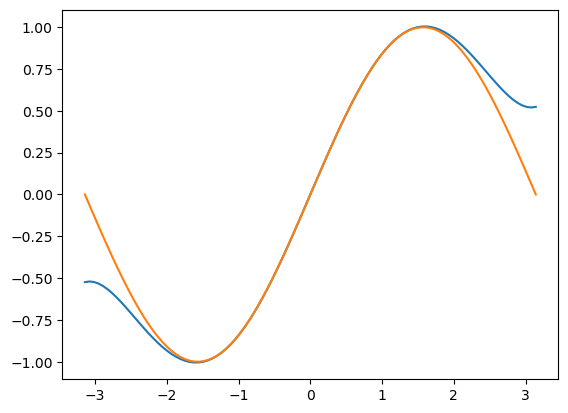

In [3]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1*np.pi, 1*np.pi, 100)
Y = [sin_x.removeO().subs(x,xi) for xi in X]
plt.plot(X, Y)
plt.plot(X, np.sin(X))

In [4]:
series(sin(x)/x)

1 - x**2/6 + x**4/120 + O(x**6)

In [5]:
limit(_, x, 0)

1

In [6]:
limit(sin(x)/x, x, 0)

1

In [7]:
series(cos(x))

1 - x**2/2 + x**4/24 + O(x**6)

In [8]:
series((cos(x)-1)/x)

-x/2 + x**3/24 - x**5/720 + O(x**6)

In [9]:
limit(_, x, 0)

0